## 1.DATASET GENERATION

In [1]:
import pandas as pd
import numpy as np
from faker import Faker #Used For generation of random data

In [2]:
fake=Faker()

In [3]:
data=[]

In [4]:
for _ in range(5000):
    customer = {
        "CustomerID": fake.unique.uuid4(),
        "Age": np.random.randint(18, 75),
        "Gender": np.random.choice(["Male", "Female"]),
        "ContractType": np.random.choice(["Month-to-month", "One year", "Two year"]),
        "MonthlyCharges": np.round(np.random.uniform(20, 120), 2),
        "TotalCharges": np.round(np.random.uniform(20, 5000), 2),
        "TechSupport": np.random.choice(["Yes", "No"]),
        "InternetService": np.random.choice(["DSL", "Fiber optic", "No"]),
        "Tenure": np.random.randint(1, 72),
        "PaperlessBilling": np.random.choice(["Yes", "No"]),
        "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"]),
        "Churn": np.random.choice(["Yes", "No"], p=[0.2, 0.8])  # 20 percent churn rate
    }
    data.append(customer)

In [5]:
df = pd.DataFrame(data)

In [6]:
df.to_csv('custom_dataset.csv',index=False)

## 2.Exploratory Data Analysis(EDA)

In [2]:
df = pd.read_csv('custom_dataset.csv')

In [3]:
numerical_values=df.describe()

In [4]:
numerical_values

,Unnamed: 0.1,Unnamed: 0,Age,MonthlyCharges,TotalCharges,Tenure,average_monthly_charges,customer_lifetime_value
count,5000.000000,5000.000000,4750.000000,4750.000000,4750.000000,4750.000000,4522.000000,4514.000000
mean,2499.500000,2499.500000,46.171789,77.249935,2727.141705,36.021263,185.571492,2790.202000
std,1443.520003,1443.520003,16.575750,78.489581,2919.204055,20.616253,515.175094,3671.229172
min,0.000000,0.000000,18.000000,20.010000,20.150000,1.000000,0.499508,21.050000
25%,1249.750000,1249.750000,32.000000,46.060000,1293.190000,18.000000,35.078737,984.770000
50%,2499.500000,2499.500000,46.000000,71.305000,2539.155000,36.000000,69.739715,2160.020000
75%,3749.250000,3749.250000,61.000000,95.552500,3780.535000,54.000000,142.070317,3771.037500
max,4999.000000,4999.000000,74.000000,1181.800000,49128.300000,71.000000,18901.700000,66937.500000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

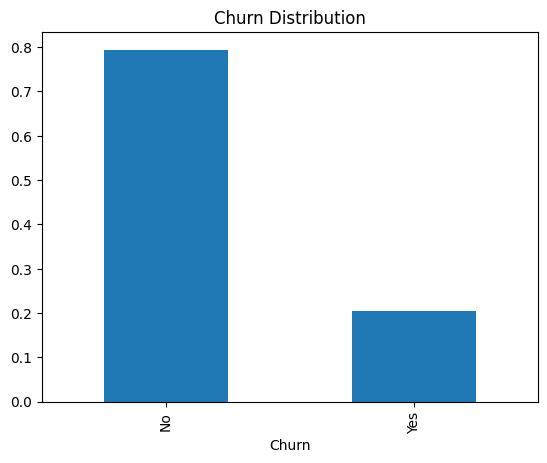

In [6]:
df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')

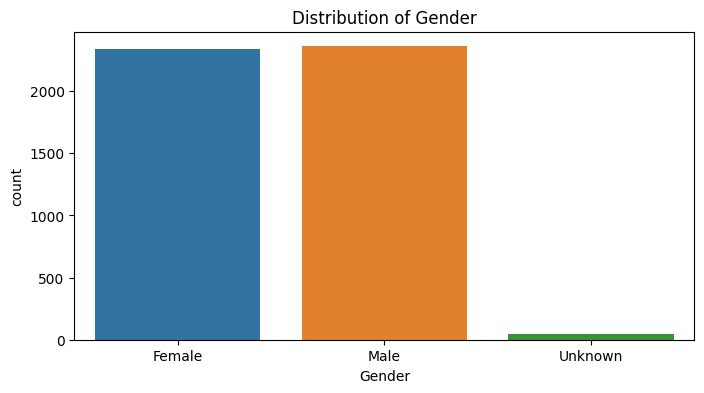

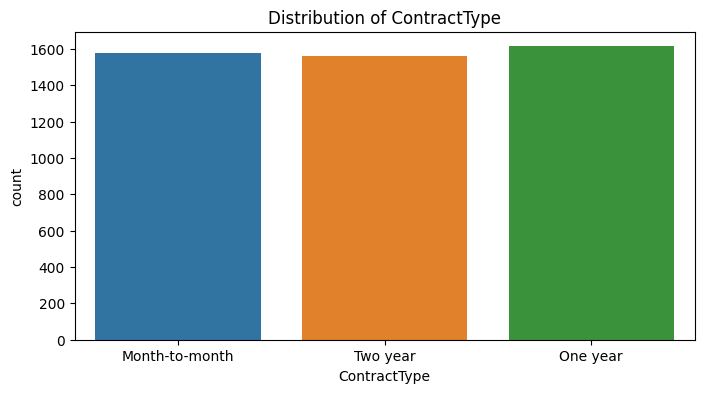

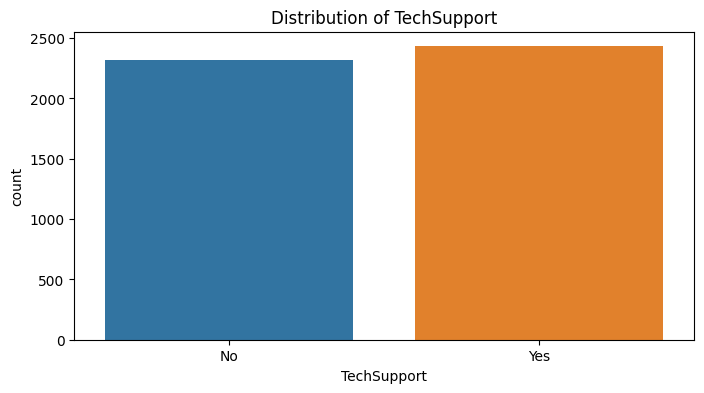

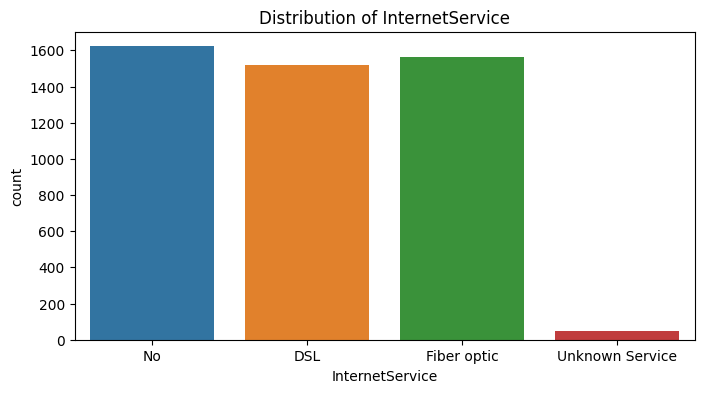

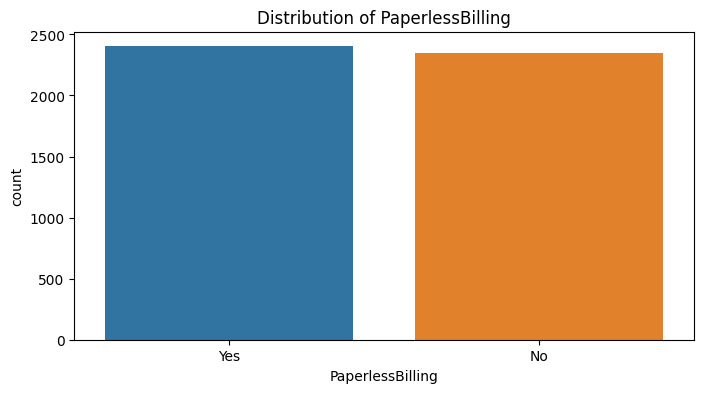

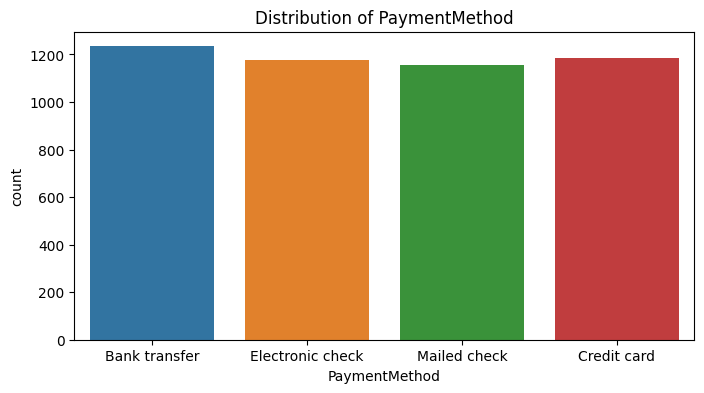

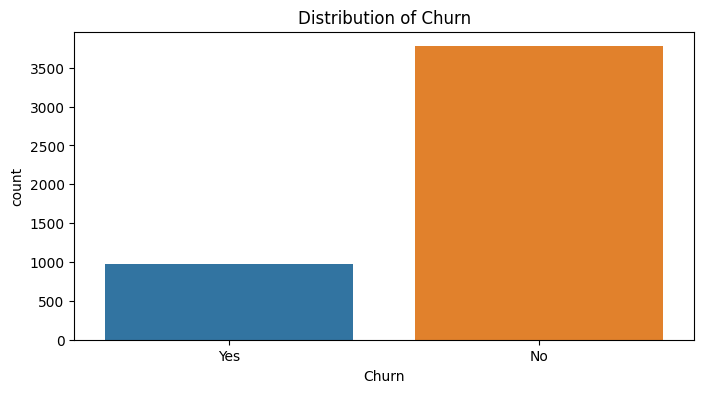

In [7]:
categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

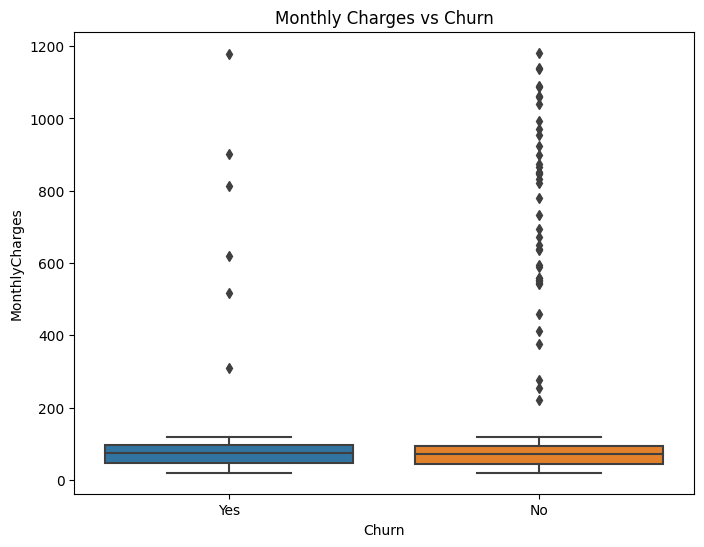

In [8]:
# Relationships between Features and The target Value
# Relationship between MonthlyCharges and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

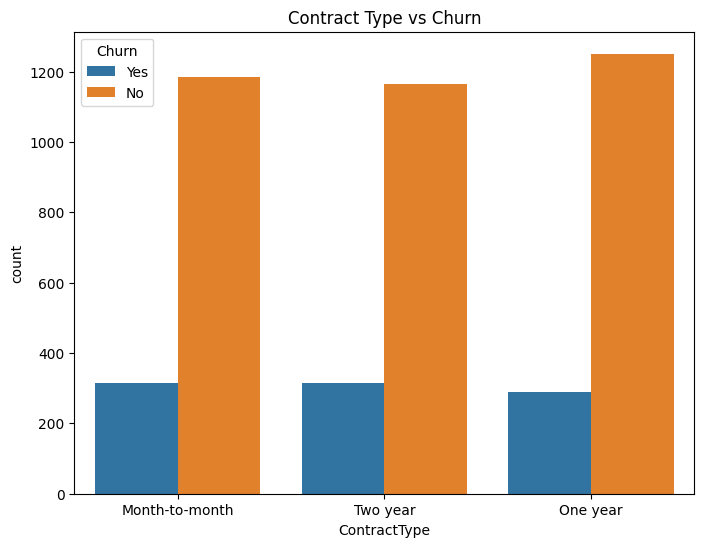

In [9]:
# Relationship between ContractType and Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

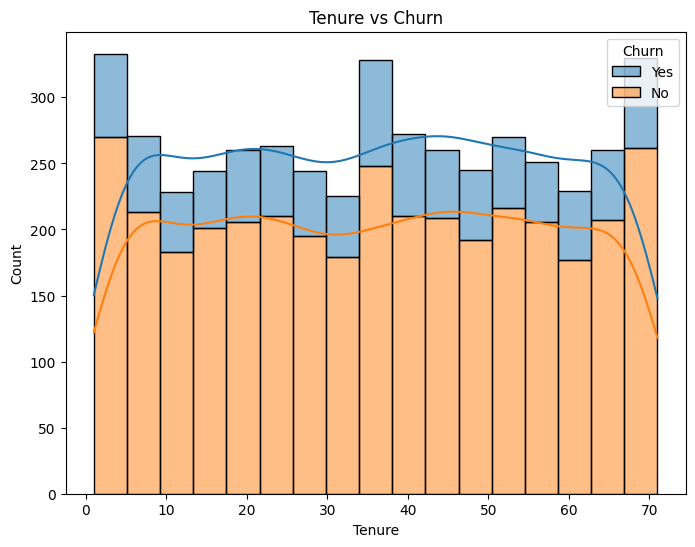

In [10]:
# Relationship between Tenure and Churn
plt.figure(figsize=(8, 6))
sns.histplot(x='Tenure', hue='Churn', multiple='stack', data=df, kde=True)
plt.title('Tenure vs Churn')
plt.show()

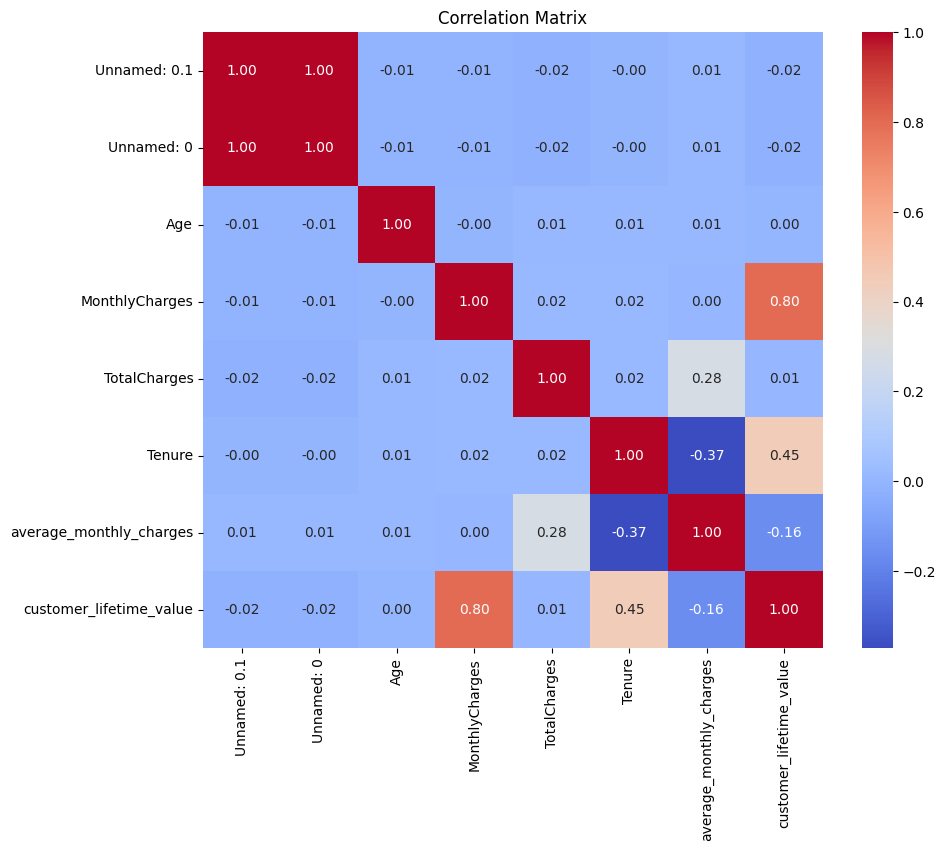

In [11]:
# Correlation matrix for numerical features
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
null_values = df.isnull().sum()

In [13]:
null_values

Unnamed: 0.1                 0
Unnamed: 0                   0
CustomerID                 250
Age                        250
Gender                     249
ContractType               250
MonthlyCharges             250
TotalCharges               250
TechSupport                250
InternetService            249
Tenure                     250
PaperlessBilling           250
PaymentMethod              250
Churn                      250
average_monthly_charges    478
customer_lifetime_value    486
dtype: int64

## 3.DATA PREPROCESSING

In [14]:
df_standard=pd.read_csv('custom_dataset.csv')

In [15]:
df_standard.head()

,Unnamed: 0.1,Unnamed: 0,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,average_monthly_charges,customer_lifetime_value
0,0,0,838e1888-708c-4cab-a003-b7432bfa10ec,68.0,Female,Month-to-month,89.97,4216.61,No,No,5.0,Yes,Bank transfer,Yes,843.322000,449.85
1,1,1,3bab161e-88b3-44d8-8f57-f55aac78f540,40.0,Male,Two year,67.95,NaN,No,DSL,20.0,No,Bank transfer,No,NaN,1359.00
2,2,2,9f84ae8c-f77a-4803-89f4-51ca721ea0e0,62.0,Female,One year,NaN,3296.28,Yes,Fiber optic,53.0,Yes,Electronic check,No,62.193962,NaN
3,3,3,NaN,71.0,Male,Two year,97.13,3387.30,No,DSL,37.0,No,Bank transfer,No,91.548649,3593.81
4,4,4,0b122c74-c25e-4ec2-a6df-1fa9cdafb797,24.0,NaN,Two year,38.71,4135.10,Yes,DSL,64.0,No,Mailed check,No,64.610938,2477.44


In [16]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             5000 non-null   int64  
 1   Unnamed: 0               5000 non-null   int64  
 2   CustomerID               4750 non-null   object 
 3   Age                      4750 non-null   float64
 4   Gender                   4751 non-null   object 
 5   ContractType             4750 non-null   object 
 6   MonthlyCharges           4750 non-null   float64
 7   TotalCharges             4750 non-null   float64
 8   TechSupport              4750 non-null   object 
 9   InternetService          4751 non-null   object 
 10  Tenure                   4750 non-null   float64
 11  PaperlessBilling         4750 non-null   object 
 12  PaymentMethod            4750 non-null   object 
 13  Churn                    4750 non-null   object 
 14  average_monthly_charges 

In [17]:
missing_values = df_standard.isnull().sum()
print(missing_values)

Unnamed: 0.1                 0
Unnamed: 0                   0
CustomerID                 250
Age                        250
Gender                     249
ContractType               250
MonthlyCharges             250
TotalCharges               250
TechSupport                250
InternetService            249
Tenure                     250
PaperlessBilling           250
PaymentMethod              250
Churn                      250
average_monthly_charges    478
customer_lifetime_value    486
dtype: int64


In [18]:
df_standard=df_standard.dropna()

In [19]:
df_standard.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
CustomerID                 0
Age                        0
Gender                     0
ContractType               0
MonthlyCharges             0
TotalCharges               0
TechSupport                0
InternetService            0
Tenure                     0
PaperlessBilling           0
PaymentMethod              0
Churn                      0
average_monthly_charges    0
customer_lifetime_value    0
dtype: int64

In [20]:
# Getting columns where categorical values are only Yes or NO
object_columns = df_standard.select_dtypes(include='object').columns   # getting all the object ( String value ) columns
object_columns

Index(['CustomerID', 'Gender', 'ContractType', 'TechSupport',
       'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [21]:
yes_no_columns=[]
for col in object_columns:
    if set(df_standard[col].unique()).issubset({'Yes','No'}):
        yes_no_columns.append(col)

yes_no_columns

['TechSupport', 'PaperlessBilling', 'Churn']

In [22]:
updated_df = df_standard

In [23]:
for col in yes_no_columns:
    updated_df[col] = updated_df[col].replace({'Yes': 1, 'No': 0}).astype(int) # replacing yes with 1 and no with 0

In [24]:
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,average_monthly_charges,customer_lifetime_value
0,0,0,838e1888-708c-4cab-a003-b7432bfa10ec,68.0,Female,Month-to-month,89.97,4216.61,0,No,5.0,1,Bank transfer,1,843.322000,449.85
6,6,6,87782d0f-13b9-4d4f-815f-5ba64441cfe6,34.0,Male,One year,52.30,2842.37,1,DSL,2.0,1,Bank transfer,0,1421.185000,104.60
7,7,7,648b672d-4946-4957-bc17-e33265a76d83,56.0,Female,Month-to-month,53.23,4430.01,1,Fiber optic,61.0,1,Bank transfer,0,72.623115,3247.03
11,11,11,4639f145-3d0b-4f56-96a5-b16209fe133c,19.0,Male,One year,38.21,1970.88,0,DSL,41.0,1,Credit card,0,48.070244,1566.61
13,13,13,5851381f-81cb-450a-bac9-909b67bc8bed,54.0,Male,Two year,51.33,1856.61,0,DSL,65.0,1,Mailed check,0,28.563231,3336.45


In [25]:
updated_df.shape

(2729, 16)

In [26]:
# getting the remaining object columns
object_columns = updated_df.select_dtypes(include='object').columns
object_columns

Index(['CustomerID', 'Gender', 'ContractType', 'InternetService',
       'PaymentMethod'],
      dtype='object')

In [27]:
#One Hot Encoding For remaining Columns
# viewing the object columns
objects_df = df_standard[object_columns]
objects_df.head()

,CustomerID,Gender,ContractType,InternetService,PaymentMethod
0,838e1888-708c-4cab-a003-b7432bfa10ec,Female,Month-to-month,No,Bank transfer
6,87782d0f-13b9-4d4f-815f-5ba64441cfe6,Male,One year,DSL,Bank transfer
7,648b672d-4946-4957-bc17-e33265a76d83,Female,Month-to-month,Fiber optic,Bank transfer
11,4639f145-3d0b-4f56-96a5-b16209fe133c,Male,One year,DSL,Credit card
13,5851381f-81cb-450a-bac9-909b67bc8bed,Male,Two year,DSL,Mailed check


In [28]:
objects_df.shape

(2729, 5)

In [29]:
encoded_columns = pd.get_dummies(objects_df.drop('CustomerID', axis=1) , dtype='int')
encoded_columns.head()

,Gender_Female,Gender_Male,Gender_Unknown,ContractType_Month-to-month,ContractType_One year,ContractType_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_Unknown Service,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
6,0,1,0,0,1,0,1,0,0,0,1,0,0,0
7,1,0,0,1,0,0,0,1,0,0,1,0,0,0
11,0,1,0,0,1,0,1,0,0,0,0,1,0,0
13,0,1,0,0,0,1,1,0,0,0,0,0,0,1


In [30]:
encoded_columns.shape

(2729, 14)

In [31]:
# deleting the object columns
updated_df = df_standard.drop(object_columns , axis=1)
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,Churn,average_monthly_charges,customer_lifetime_value
0,0,0,68.0,89.97,4216.61,0,5.0,1,1,843.322000,449.85
6,6,6,34.0,52.30,2842.37,1,2.0,1,0,1421.185000,104.60
7,7,7,56.0,53.23,4430.01,1,61.0,1,0,72.623115,3247.03
11,11,11,19.0,38.21,1970.88,0,41.0,1,0,48.070244,1566.61
13,13,13,54.0,51.33,1856.61,0,65.0,1,0,28.563231,3336.45


In [32]:
# appending the encoded columns to the updated_df
updated_df = pd.concat([updated_df, encoded_columns], axis=1)
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,Churn,average_monthly_charges,...,ContractType_One year,ContractType_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_Unknown Service,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,68.0,89.97,4216.61,0,5.0,1,1,843.322000,...,0,0,0,0,1,0,1,0,0,0
6,6,6,34.0,52.30,2842.37,1,2.0,1,0,1421.185000,...,1,0,1,0,0,0,1,0,0,0
7,7,7,56.0,53.23,4430.01,1,61.0,1,0,72.623115,...,0,0,0,1,0,0,1,0,0,0
11,11,11,19.0,38.21,1970.88,0,41.0,1,0,48.070244,...,1,0,1,0,0,0,0,1,0,0
13,13,13,54.0,51.33,1856.61,0,65.0,1,0,28.563231,...,0,1,1,0,0,0,0,0,0,1


In [33]:
updated_df.shape

(2729, 25)

In [34]:
# storing the data set into a variable called data
data = updated_df
print(data.shape)
data.head(2)

(2729, 25)


,Unnamed: 0.1,Unnamed: 0,Age,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,Churn,average_monthly_charges,...,ContractType_One year,ContractType_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_Unknown Service,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,68.0,89.97,4216.61,0,5.0,1,1,843.322,...,0,0,0,0,1,0,1,0,0,0
6,6,6,34.0,52.30,2842.37,1,2.0,1,0,1421.185,...,1,0,1,0,0,0,1,0,0,0


In [35]:
# x variable will be all the columns excluding the Churn column
feature = data.drop('Churn', axis=1)
print(feature.shape)
feature.head()

(2729, 24)


,Unnamed: 0.1,Unnamed: 0,Age,MonthlyCharges,TotalCharges,TechSupport,Tenure,PaperlessBilling,average_monthly_charges,customer_lifetime_value,...,ContractType_One year,ContractType_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_Unknown Service,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,68.0,89.97,4216.61,0,5.0,1,843.322000,449.85,...,0,0,0,0,1,0,1,0,0,0
6,6,6,34.0,52.30,2842.37,1,2.0,1,1421.185000,104.60,...,1,0,1,0,0,0,1,0,0,0
7,7,7,56.0,53.23,4430.01,1,61.0,1,72.623115,3247.03,...,0,0,0,1,0,0,1,0,0,0
11,11,11,19.0,38.21,1970.88,0,41.0,1,48.070244,1566.61,...,1,0,1,0,0,0,0,1,0,0
13,13,13,54.0,51.33,1856.61,0,65.0,1,28.563231,3336.45,...,0,1,1,0,0,0,0,0,0,1


In [36]:
# Y variable will be the Churn column
target = data['Churn']
print(target.shape)
target.head()

(2729,)


0     1
6     0
7     0
11    0
13    0
Name: Churn, dtype: int32

## 4.MODEL BUILDING

### BASELINE MODELS

### 1.Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature , target, test_size=0.2) # 0.3 means test size is 30%

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='liblinear',random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [40]:
predictions=LR.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
LR_Accuracy_Score = accuracy_score(y_test, predictions)

In [42]:
print(LR_Accuracy_Score)

0.7985347985347986


## 2.Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
predictions2=RF.predict(X_test)

In [45]:
RF_Accuracy_Score = accuracy_score(y_test, predictions2)

In [46]:
print(RF_Accuracy_Score)

0.7985347985347986


### 3.Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=42)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
predictions3=GBC.predict(X_test)

In [49]:
GBC_Accuracy=accuracy_score(y_test,predictions3)

In [50]:
GBC_Accuracy

0.7985347985347986

### 4.XGBoost

In [51]:
from xgboost import XGBClassifier
XGB=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
predictions4=XGB.predict(X_test)

In [53]:
XGB_acc=accuracy_score(y_test,predictions4)

In [54]:
XGB_acc

0.7637362637362637

### Optimizing Using Hyperparameters

In [55]:
# For Logistic Regression using GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


In [56]:
lr = LogisticRegression(random_state=42)

In [57]:
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [58]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [59]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score:  0.7975269246110889


In [60]:
best_lr = grid_search.best_estimator_
predictions_lr = best_lr.predict(X_test)

In [61]:
lr_accuracy_score = accuracy_score(y_test, predictions_lr)
print("Optimized Regression Accuracy: ", lr_accuracy_score)

Optimized Regression Accuracy:  0.7985347985347986


#### For Random Forest

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [63]:
rf = RandomForestClassifier(random_state=42)

In [64]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [65]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DACEA1BD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DAD311B10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DAD3130D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DACEB4E90>},
                   random_state=42, scoring='accuracy')

In [66]:
print("Best parameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters:  {'max_depth': 43, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 206}
Best cross-validation score:  0.7975269246110889


In [67]:
best_rf = random_search.best_estimator_
predictions_rf = best_rf.predict(X_test)

In [68]:
rf_accuracy_score = accuracy_score(y_test, predictions_rf)

In [69]:
rf_accuracy_score

0.7985347985347986

## 5.MODEL EVALUATION

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Metrics for Logistic Regression:
Accuracy: 0.7985
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC-ROC: 0.4769


C:\Users\anura\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


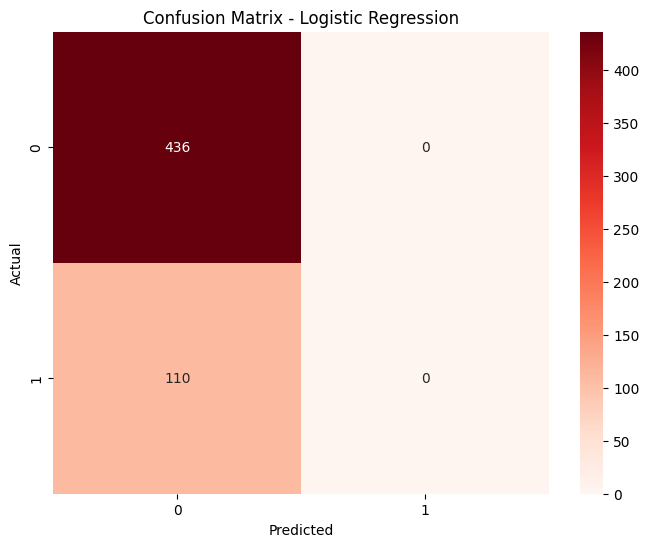

Metrics for Random Forest:
Accuracy: 0.7985
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC-ROC: 0.4578


C:\Users\anura\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


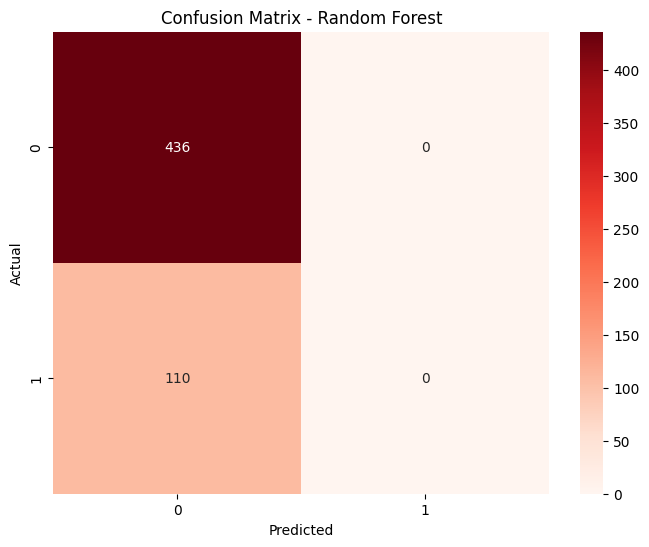

Metrics for Gradient Boosting Classifier:
Accuracy: 0.7985
Precision: 0.5000
Recall: 0.0091
F1-score: 0.0179
AUC-ROC: 0.4701


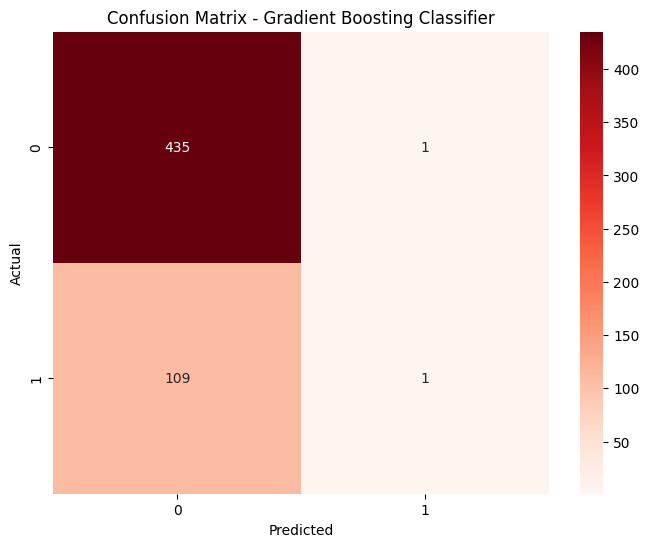

Metrics for XGBoost Classifier:
Accuracy: 0.7637
Precision: 0.1200
Recall: 0.0273
F1-score: 0.0444
AUC-ROC: 0.4668


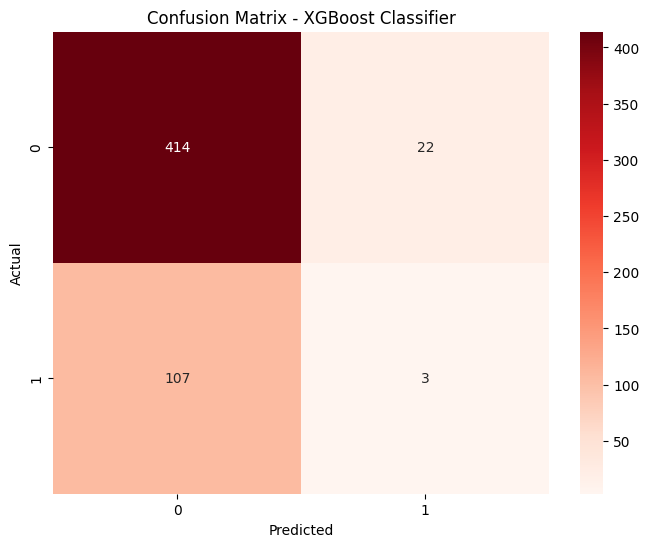

Metrics for Logistic with GridSearch:
Accuracy: 0.7985
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC-ROC: 0.5000


C:\Users\anura\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


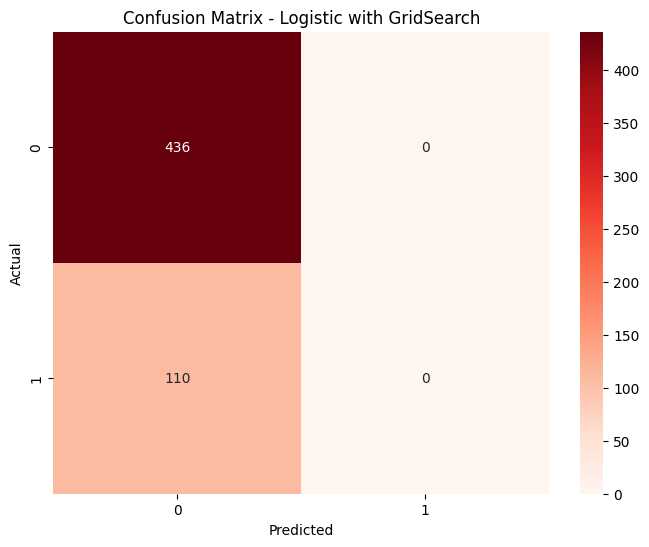

Metrics for Random Forest with RandomizedSearch:
Accuracy: 0.7985
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC-ROC: 0.4708


C:\Users\anura\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


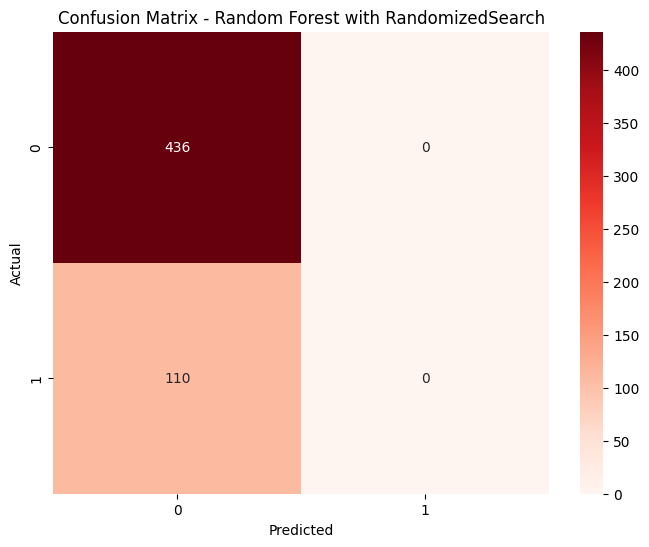

In [71]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate each model
evaluate_model(LR, X_test, y_test, "Logistic Regression")
evaluate_model(RF, X_test, y_test, "Random Forest")
evaluate_model(GBC, X_test, y_test, "Gradient Boosting Classifier")
evaluate_model(XGB, X_test, y_test, "XGBoost Classifier")
evaluate_model(grid_search, X_test, y_test, "Logistic with GridSearch")
evaluate_model(random_search, X_test, y_test, "Random Forest with RandomizedSearch")

In [72]:
# ROC Curves
from sklearn.metrics import roc_curve

In [73]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Gradient Boosting": GBC,
    "XGBoost":XGB,
    "Logistic With Grid Search":grid_search,
    "Random Forest With Randomized Search":random_search
}

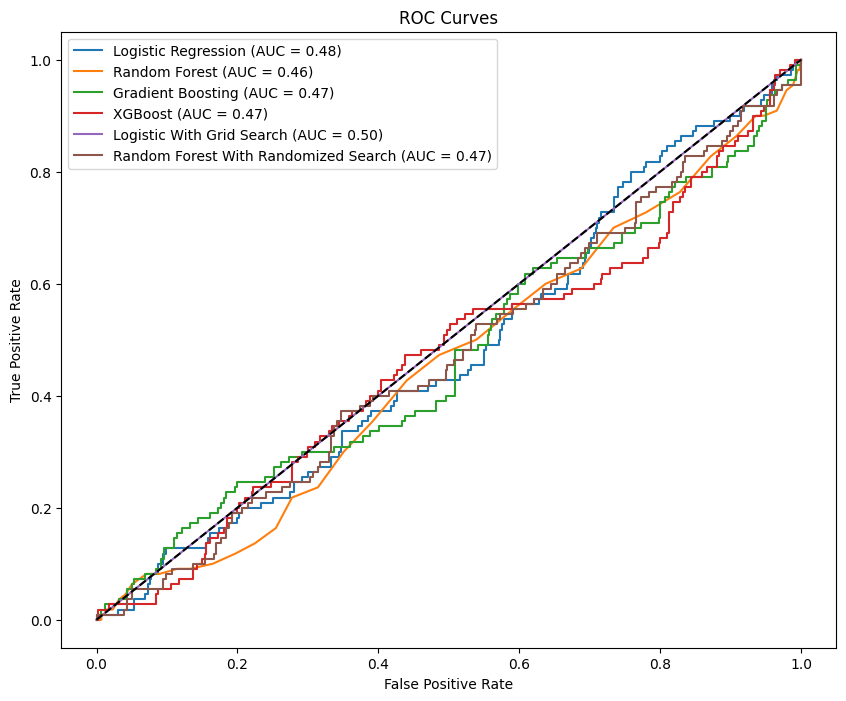

In [74]:
plot_roc_curves(models, X_test, y_test)

In [75]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Perform cross-validation for each model
cross_validate_model(LR, X_train, y_train)
cross_validate_model(RF, X_train, y_train)
cross_validate_model(GBC, X_train, y_train)
cross_validate_model(XGB, X_train, y_train)
cross_validate_model(grid_search, X_train, y_train)
#cross_validate_model(random_search, X_train, y_train)

Cross-validation scores: [0.798627   0.79633867 0.79633867 0.79816514 0.79816514]
Mean CV score: 0.7975 (+/- 0.0020)
Cross-validation scores: [0.798627   0.79633867 0.79405034 0.79816514 0.79816514]
Mean CV score: 0.7971 (+/- 0.0034)
Cross-validation scores: [0.78947368 0.79405034 0.78947368 0.79816514 0.7912844 ]
Mean CV score: 0.7925 (+/- 0.0066)
Cross-validation scores: [0.76430206 0.75514874 0.76659039 0.76605505 0.75458716]
Mean CV score: 0.7613 (+/- 0.0107)
Cross-validation scores: [0.798627   0.79633867 0.79633867 0.79816514 0.79816514]
Mean CV score: 0.7975 (+/- 0.0020)


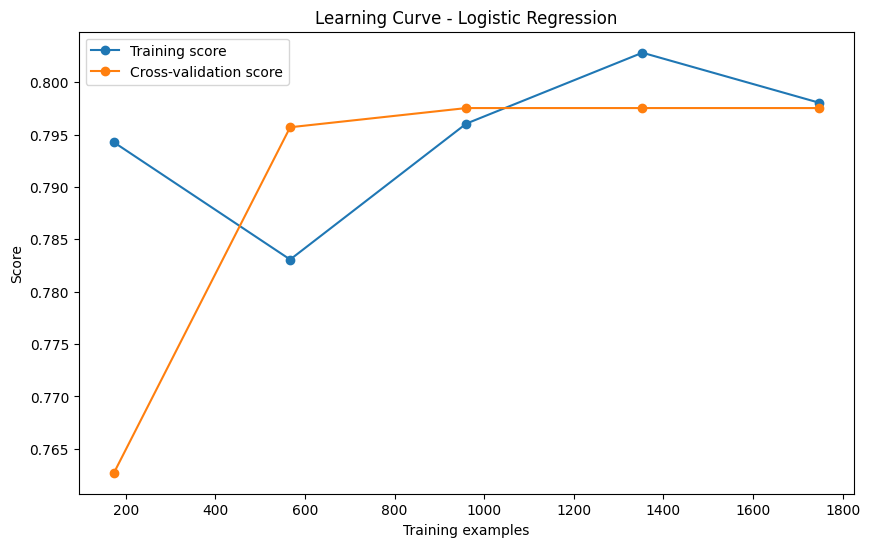

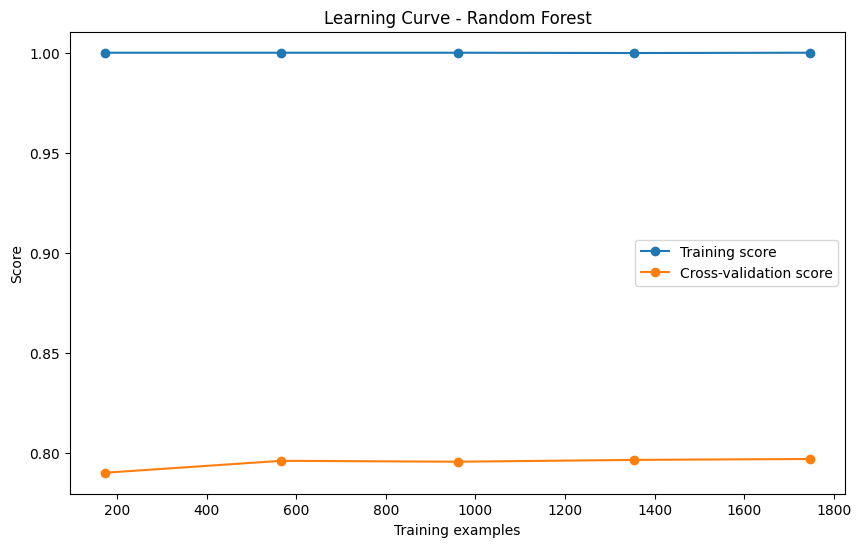

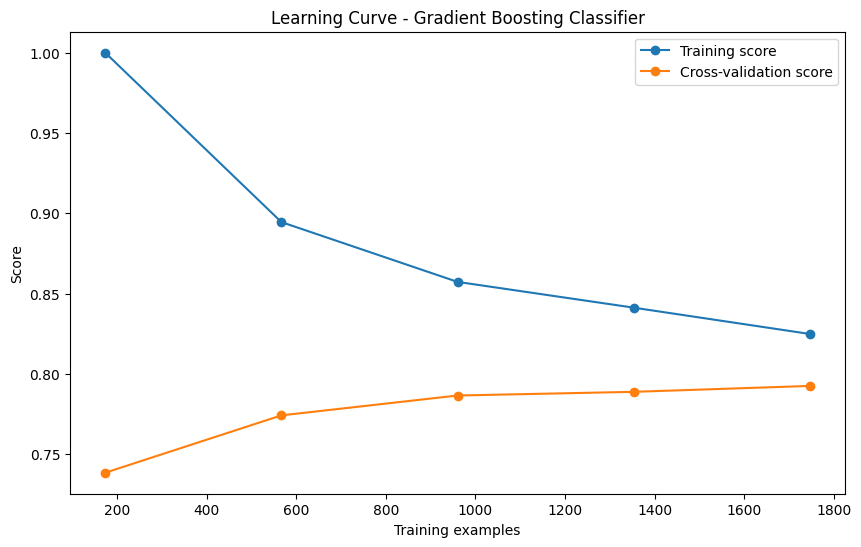

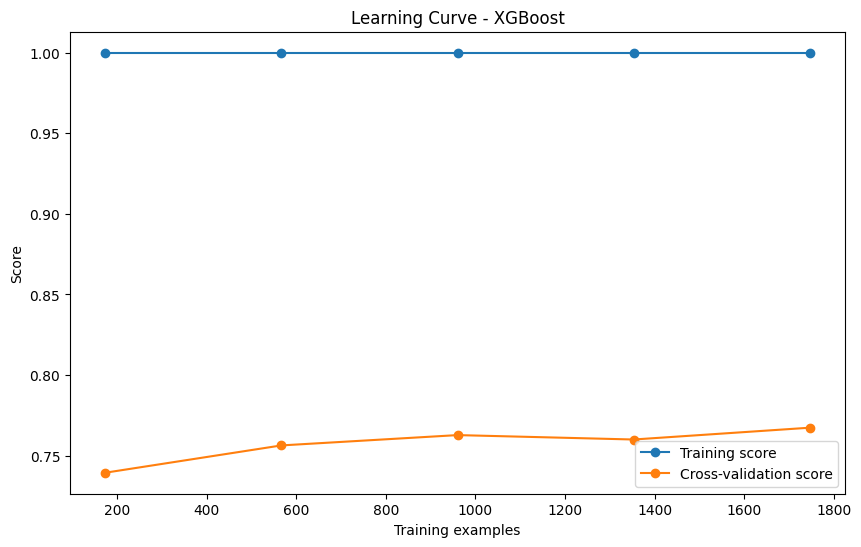

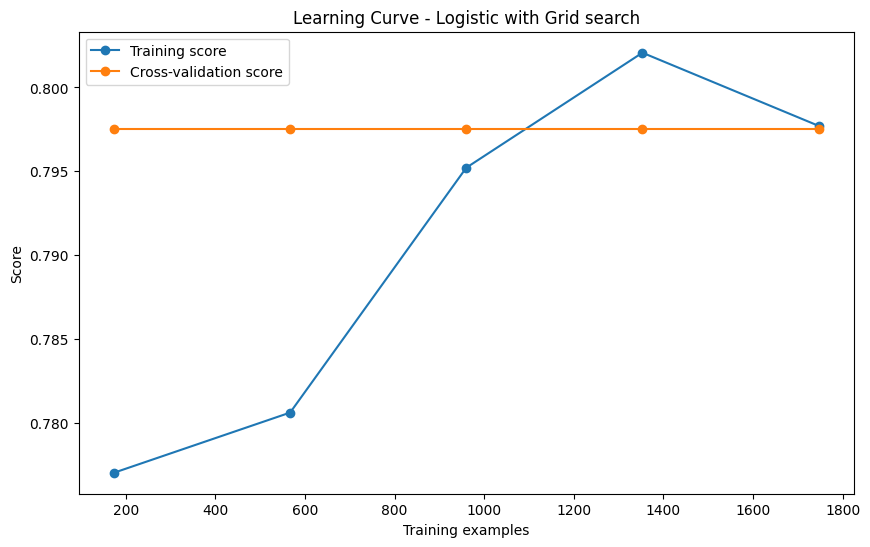

In [76]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


plot_learning_curve(LR, X_train, y_train, "Logistic Regression")
plot_learning_curve(RF, X_train, y_train, "Random Forest")
plot_learning_curve(GBC, X_train, y_train, "Gradient Boosting Classifier")
plot_learning_curve(XGB, X_train, y_train, "XGBoost")
plot_learning_curve(grid_search, X_train, y_train, "Logistic with Grid search")
#plot_learning_curve(random_search, X_train, y_train, "Random Forest With Randomizer")

In [77]:
import pandas as pd


results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost','Logistic Using GridSearch','Random Forest Using Randomizer'],
    'Accuracy': [0.7766,0.7766,0.7637, 0.7637,0.7766,0.7766],
    'Precision': [0.0000, 0.0000,  0.1111, 0.3793,0.0000,0.0000],
    'Recall': [0.0000, 0.0000,0.0082, 0.0902,0.0000,0.0000],
    'F1-Score': [0.0000, 0.0000, 0.0153, 0.1457,0.0000,0.0000],
    'AUC-ROC' : [0.4820,0.4894,0.4640,0.5092,0.5000,0.4847]
}


df_results = pd.DataFrame(results)


print(df_results)


                            Model  Accuracy  Precision  Recall  F1-Score  \
0             Logistic Regression    0.7766     0.0000  0.0000    0.0000   
1                   Random Forest    0.7766     0.0000  0.0000    0.0000   
2               Gradient Boosting    0.7637     0.1111  0.0082    0.0153   
3                         XGBoost    0.7637     0.3793  0.0902    0.1457   
4       Logistic Using GridSearch    0.7766     0.0000  0.0000    0.0000   
5  Random Forest Using Randomizer    0.7766     0.0000  0.0000    0.0000   

   AUC-ROC  
0   0.4820  
1   0.4894  
2   0.4640  
3   0.5092  
4   0.5000  
5   0.4847  


### BY interpretation We Can See that XGBoost Classifier is Good Among This.

In [78]:
#Hyperparameterization On XGBoost Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='f1', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [79]:
# Evaluation After Optimization.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_xgb_model = grid_search.best_estimator_

In [80]:
y_pred = best_xgb_model.predict(X_test)

In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
#Evaluation Metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Best XGBoost Model - Accuracy: {accuracy:.4f}")
print(f"Best XGBoost Model - Precision: {precision:.4f}")
print(f"Best XGBoost Model - Recall: {recall:.4f}")
print(f"Best XGBoost Model - F1-Score: {f1:.4f}")
print(f"Best XGBoost Model - AUC-ROC: {auc_roc:.4f}")

Best XGBoost Model - Accuracy: 0.7839
Best XGBoost Model - Precision: 0.3333
Best XGBoost Model - Recall: 0.0727
Best XGBoost Model - F1-Score: 0.1194
Best XGBoost Model - AUC-ROC: 0.5180


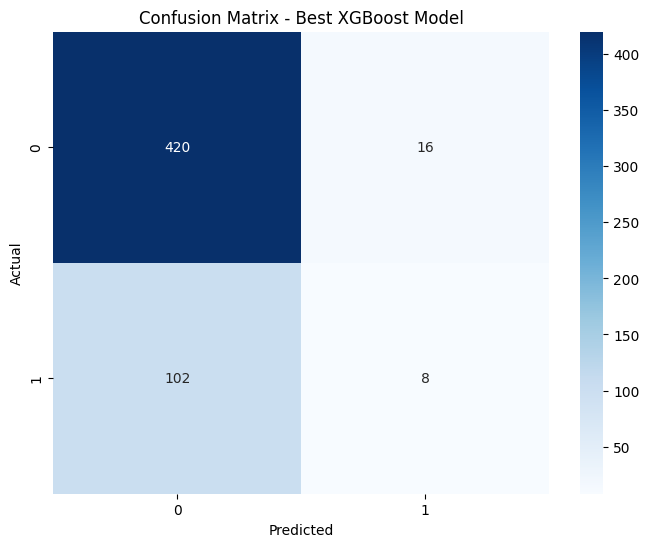

In [83]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()